# Can one predict the student's math performance based on external parameters?  
**Introduction**: From my experience as an assistant teacher, one of the most difficult areas of study for a high schooler is mathematics.
Certainly, one can attribute the failing or passing grades to either their performance or, rather, their opportunities.
However, is this really true? Whenever we try to determine the approximation of their grades, we intuitively base it on their previous grades and their environment opportunities. This is something we take as 'naturally visible' (at least as an emergent teacher).
This project is about two things:
- To know if there are any external parameters to get to know the student's grade performance (and not only the previous grades)
- To try to predict (using those parameters and a Machine Learning model) the last grade of a high school student in Mathematics

Both are regression problems, and for the prediction it's going to be used decision tree regressor.

**Data usage:** It's going to be used the following dataset:

Cortez, Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

(https://archive.ics.uci.edu/dataset/320/student+performance), it approaches student achievement in secondary education of two Portuguese schools.
It's going to be used only the mathematics dataset (mat), and the target is to predict G3 (which is the final grade of the period).

**Data:**

The dataset that's going to be used will be a *tabulated* data type.

## Libraries import

In [1]:
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn import tree

## Data import

In [2]:
df = pd.read_csv('student-mat.csv', sep=';') #Import the dataset using the symbol ; as separation between data

In [3]:
df.head() #Show the first 5 rows of the dataset

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

There are 33 columns with 395 entries each, meaning that the data size is 13,035. The data types are categorical (17 cols.) and integers (16 cols.)

In [4]:
print(df.info()) #Show the information of the dataset
df.describe() #Show the statistics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

## Data cleaning

There are zero 'na' values, which properly means that there aren't any missing values.

In [5]:
missing_percent = df.isna().mean() * 100
print(missing_percent)

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64


To change the categorical into numerical values, it was used LabelEncoder in sklearn

In [6]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Column: {col}")
    print("String categories:\n", df[col].unique())

    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    print("Int categories:\n", df[col].unique())
    print("-" * 30)

print(df.info())
df.head()

Column: school
String categories:
 ['GP' 'MS']
Int categories:
 [0 1]
------------------------------
Column: sex
String categories:
 ['F' 'M']
Int categories:
 [0 1]
------------------------------
Column: address
String categories:
 ['U' 'R']
Int categories:
 [1 0]
------------------------------
Column: famsize
String categories:
 ['GT3' 'LE3']
Int categories:
 [0 1]
------------------------------
Column: Pstatus
String categories:
 ['A' 'T']
Int categories:
 [0 1]
------------------------------
Column: Mjob
String categories:
 ['at_home' 'health' 'other' 'services' 'teacher']
Int categories:
 [0 1 2 3 4]
------------------------------
Column: Fjob
String categories:
 ['teacher' 'other' 'services' 'health' 'at_home']
Int categories:
 [4 2 3 1 0]
------------------------------
Column: reason
String categories:
 ['course' 'other' 'home' 'reputation']
Int categories:
 [0 2 1 3]
------------------------------
Column: guardian
String categories:
 ['mother' 'father' 'other']
Int categories:


school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  

[5 rows x 33 columns]

## Exploratory Data Analysis

Firstly it's required to find the correlation analysis of each. It's required to generate the correlation matrix

In [7]:
corr_matrix = df.corr()
print(corr_matrix)

              school       sex       age   address   famsize   Pstatus  \
school      1.000000 -0.012286  0.377610 -0.279797  0.064866  0.045923   
sex        -0.012286  1.000000 -0.028606 -0.028504  0.089862  0.023443   
age         0.377610 -0.028606  1.000000 -0.146722  0.037847  0.029598   
address    -0.279797 -0.028504 -0.146722  1.000000  0.072472 -0.042572   
famsize     0.064866  0.089862  0.037847  0.072472  1.000000 -0.149612   
Pstatus     0.045923  0.023443  0.029598 -0.042572 -0.149612  1.000000   
Medu       -0.133333  0.078228 -0.163658  0.138804 -0.043068 -0.123565   
Fedu       -0.079807  0.034878 -0.163438  0.072178 -0.058879 -0.088730   
Mjob       -0.056670  0.191421 -0.069104  0.108818  0.071386 -0.054476   
Fjob        0.018974  0.084957 -0.035191 -0.001911 -0.084448  0.033892   
reason     -0.090010 -0.095867 -0.015337 -0.047891 -0.019212 -0.003553   
guardian    0.011109 -0.071343  0.290485 -0.044512 -0.002718 -0.108715   
traveltime  0.242308  0.059722  0.0706

To visualize we are going to generate the Heatmap

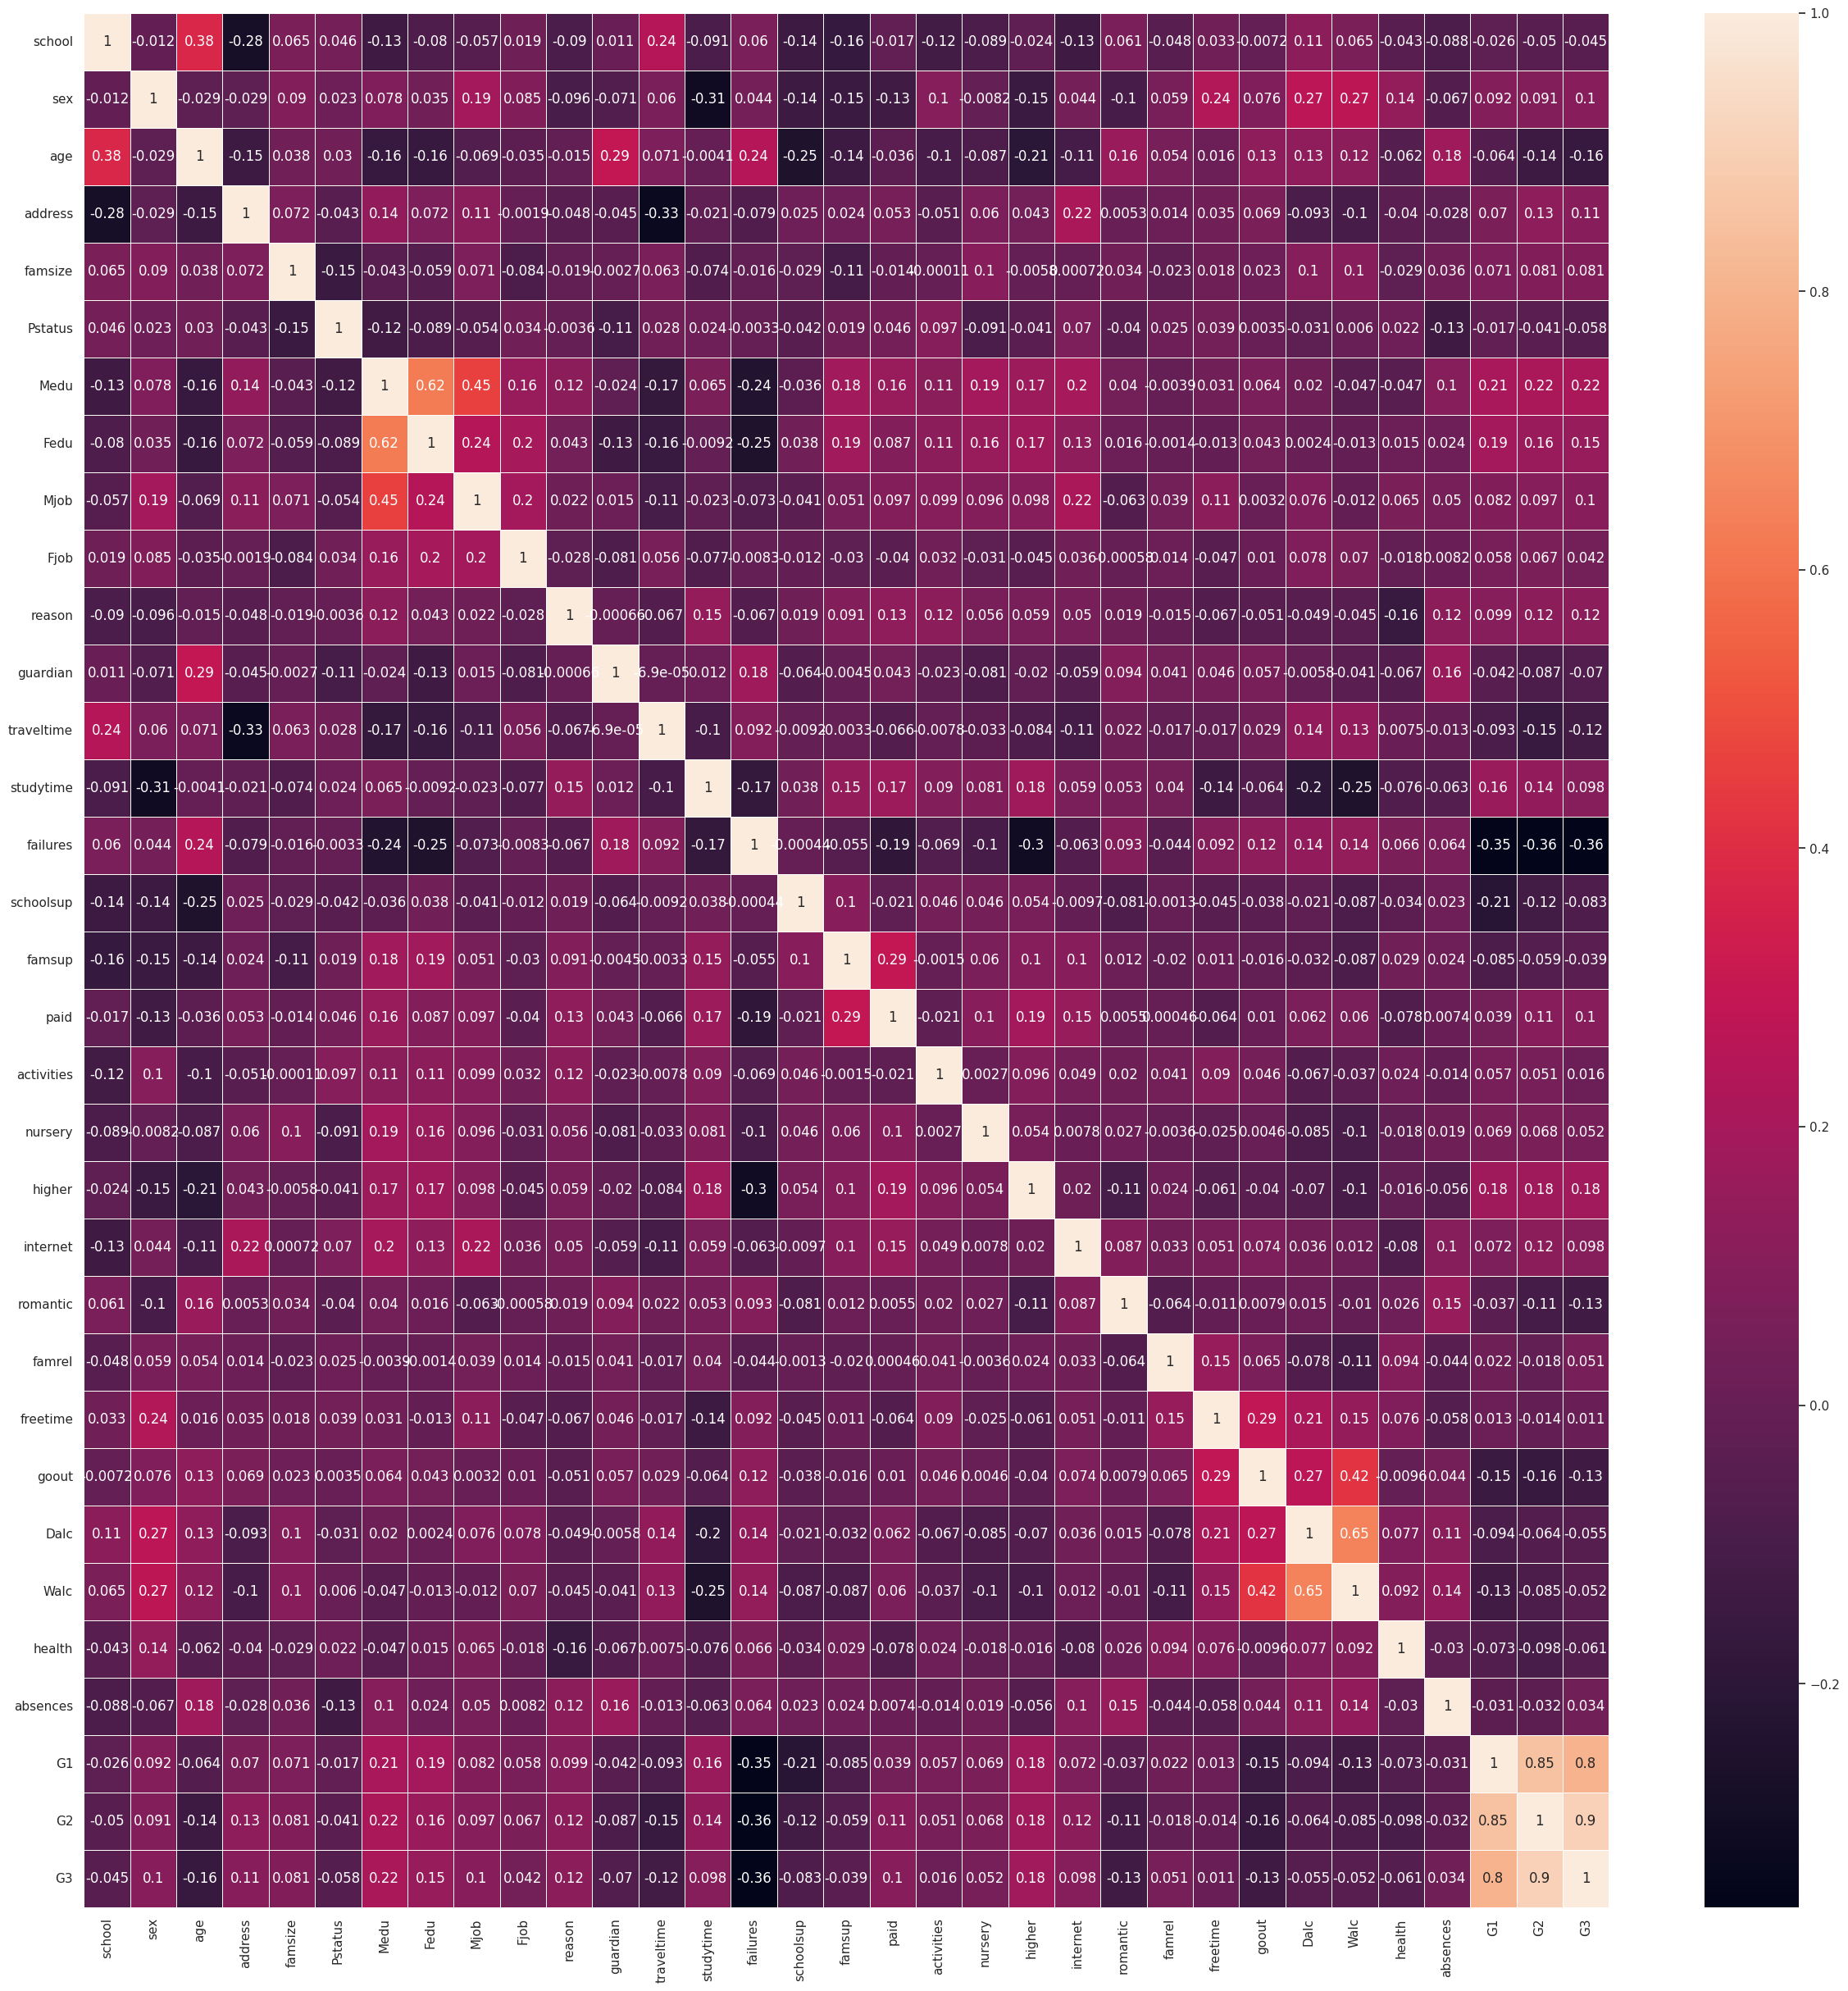

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, linewidths=.4, ax=ax)
plt.show()

As one can see, the feature that concerns us is G3, and if we are going to rank the features, G1 and G2 seems to be the most convenient. However it's going to be seen later, that they have high collinearity. Meaning that we need to take into account other significative features

Then we generate the sorting of the values for G3:

In [10]:
correlation = df.corr()['G3']
print(correlation.sort_values())

failures     -0.360415
age          -0.161579
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
schoolsup    -0.082788
guardian     -0.070109
health       -0.061335
Pstatus      -0.058009
Dalc         -0.054660
Walc         -0.051939
school       -0.045017
famsup       -0.039157
freetime      0.011307
activities    0.016100
absences      0.034247
Fjob          0.042286
famrel        0.051363
nursery       0.051568
famsize       0.081407
studytime     0.097820
internet      0.098483
paid          0.101996
Mjob          0.102082
sex           0.103456
address       0.105756
reason        0.121994
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64


Here we selected the following features: G3, G2, G1, Medu (Mother's education), higher (If the student plans on going to higher education), and Fedu (Father's education)

In [11]:
df_select = df[['G3', 'G2', 'G1', 'Medu', 'higher', 'Fedu']]
df_select.head()

G3  G2  G1  Medu  higher  Fedu
0   6   6   5     4       1     4
1   6   5   5     1       1     1
2  10   8   7     1       1     1
3  15  14  15     4       1     2
4  10  10   6     3       1     3

Here is the first Linear model, as it can be seen, the feature 'Fedu' has a very large P value. And the R-squared value is very low. So we will be dropping Fedu.

In [13]:
model = smf.ols(formula='G3 ~ Medu + higher + Fedu', data=df_select)

res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     9.676
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           3.57e-06
Time:                        15:09:07   Log-Likelihood:                -1147.0
No. Observations:                 395   AIC:                             2302.
Df Residuals:                     391   BIC:                             2318.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2109      1.080      4.825      0.0

We generate a second Linear model, having a higher R-squared value and having low P values on the features, and including the G1 and G2 features

In [14]:
model = smf.ols(formula='G3 ~ G1 + G2 + G1:higher + higher:Medu + higher', data=df_select)

res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     363.3
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          4.25e-144
Time:                        15:12:00   Log-Likelihood:                -818.50
No. Observations:                 395   AIC:                             1649.
Df Residuals:                     389   BIC:                             1673.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.5252      1.333     -2.644      

However there can be collinearity between features, so we will check the VIF:

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_select[['G1', 'G2', 'Medu', 'higher', 'Fedu']]
y = df_select['G3']

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

  feature        VIF
0      G1  40.833622
1      G2  33.689546
2    Medu  11.984286
3  higher  11.730436
4    Fedu  10.539284


As it can be seen, the VIF of G1 and G2 is too high, so we will be dropping G1

In [16]:
X = df_select[['G2', 'Medu', 'higher']]
y = df_select['G3']

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

  feature        VIF
0      G2   8.588220
1    Medu   7.212304
2  higher  10.227931


Finally we generate our last Linear model including G2, higher, and Medu

In [17]:
model = smf.ols(formula='G3 ~ G2 + higher:Medu + Medu', data=df_select)

res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     593.8
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          3.58e-145
Time:                        15:34:08   Log-Likelihood:                -822.48
No. Observations:                 395   AIC:                             1653.
Df Residuals:                     391   BIC:                             1669.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5000      0.361     -4.157      

## KNN Regression Model

Now we are going to generate our KNN Regression model

In [18]:
df_select = df_select[['G3', 'G2', 'Medu', 'higher']]
df_select.head()

G3  G2  Medu  higher
0   6   6     4       1
1   6   5     1       1
2  10   8     1       1
3  15  14     4       1
4  10  10     3       1

We are going to split our training data

In [19]:
df_train = df_select.sample(frac=0.8, random_state=0)
df_test = df_select.drop(df_train.index)
df_train.shape, df_test.shape
X_train = df_train.drop('G3', axis=1)
X_test = df_test.drop('G3', axis=1)
y_train = df_train['G3']
y_test = df_test['G3']
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 3), (79, 3), (316,), (79,))

Finally generate our KNN Regression

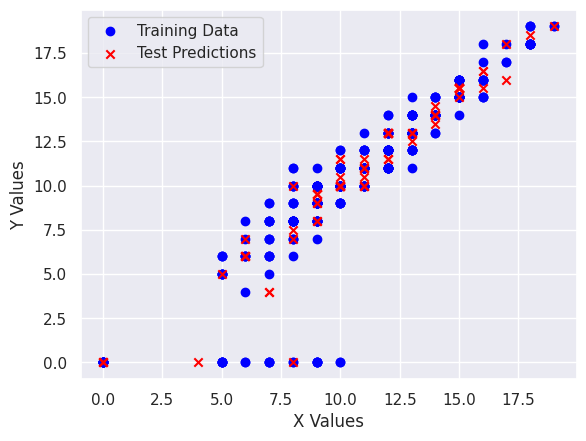

In [20]:
# KNN regression
k = 2

# Make predictions for the test data
predictions = []
for i in range(X_test.shape[0]): # Iterate over rows of X_test
    x_test = X_test.iloc[i].values # Get values of the current row as a numpy array
    # Calculate distances between x_test and all data points in X_train
    distances = [np.linalg.norm(x_test - x_train) for x_train in X_train.values] # Convert X_train rows to numpy arrays

    # Sort data points by distance and get the indices of the K nearest neighbors
    k_indices = np.argsort(distances)[:k]

    # Get the target values of the K nearest neighbors
    k_nearest_neighbors = [y_train.iloc[i] for i in k_indices]

    # Calculate the regression prediction as the mean of the target values of the K neighbors
    prediction = np.mean(k_nearest_neighbors)
    predictions.append(prediction)

# Plot the training data points
plt.scatter(X_train.iloc[:, 0], y_train, label="Training Data", color="blue") # Access first column of X_train

# Plot the test data points and their predictions
plt.scatter(X_test.iloc[:, 0], predictions, label="Test Predictions", color="red", marker="x") # Access first column of X_test

plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()
plt.show()

As it can be seen by the plot the prediction is close, but not perfect to the training data, meaning a loss in the prediction

## Decision Tree Regressor

We are going to generate our Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=44) # Create a decision tree regressor object
model.fit(X_train, y_train) # Fit the model to the training data
predictions = model.predict(X_test) # Make predictions on the test data
print(predictions) # Print the predictions

[15.25        7.84615385 10.33333333 15.83333333 15.83333333 11.83333333
 12.8        18.25       19.          9.18181818 15.41666667 15.25
  4.66666667  6.66666667  9.6        14.3         9.5        17.
  7.66666667 10.33333333 15.41666667 14.         12.88888889 14.
  7.          0.          0.         11.25       12.8        10.
 10.33333333 11.08333333 10.33333333  3.75        9.         11.83333333
  9.28571429  9.         15.          9.          7.83333333  6.
 12.125       0.         12.125       0.         10.5        11.08333333
 11.83333333 18.          9.18181818 13.          7.66666667  9.6
 14.         11.08333333 15.41666667 12.         13.          7.84615385
 14.          6.28571429 15.25        7.5        15.25       12.
 15.25       15.41666667  4.66666667  0.         11.83333333 16.5
 12.         15.41666667  9.6         4.66666667 10.5         6.
 11.83333333]


Now we are going to find the RMSE and the prediction fot the test set

In [25]:
# Predicting the target values of the test set
y_pred = model.predict(X_test)
# Import the necessary function
from sklearn.metrics import mean_squared_error

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  1.797


In [26]:
X_test

G2  Medu  higher
9    15     3       1
25    9     2       1
28   11     3       1
31   16     4       1
32   16     4       1
..   ..   ...     ...
365  10     1       1
367   6     1       1
379  10     3       1
381   6     2       1
393  12     3       1

[79 rows x 3 columns]

In [27]:
y_test

9      15
25      8
28     11
31     17
32     16
       ..
365    10
367     0
379    10
381     7
393    10
Name: G3, Length: 79, dtype: int64

Finally we are going to have our prediction model based on three things, G2 (the latest grade), Medu (Mother's education), and higher (If the student wants to go to higher education), giving us the G3 score

In [28]:
model.predict([[8, 2, 0]]) # Predict the target value for a new data point

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([10.])

In [ ]:
from sklearn.tree import plot_tree # Import the plot_tree function
plt.figure(figsize=(100,80), dpi=150) # Set the figure size and resolution
plot_tree(model, feature_names=X.columns); # Plot the decision tree

# Conclusions

The answer to our first question is: 50/50, it's possible to predict the performance of a student based on external factors, however, we need to be aware of multiple factors that aren't included in the model. Furthermore it's needed to add the geopolitical situation the student is living. It will not be the same for students in Portugal as it is for students in Colombia.

This model has its limitations, since it's a very small model that considers only a class of high schoolers in Portugal.

After the KNN Model, we can see that the prediction is high, but with loss. Also with the Decision tree regressor we can see that some other features might affect the prediction, it's possible to improve the P values, however I think other models also can be used to improve this.